In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx

## Data Loading

In [2]:
coordinates = pd.read_csv('locations(2).csv')
incidence = pd.read_csv('incidence_matrix(2).csv')

### Coordinates

In [3]:
coordinates.rename(columns = {"Unnamed: 0" : "label"}, inplace = True)

In [4]:
coordinates

,label,x,y
0,c1,-5.21,-0.36
1,c4,7.53,-6.28
2,c8,-1.80,-7.84
3,c11,3.09,6.42
4,c12,-2.94,2.94
5,c13,-4.59,5.66
6,c16,-5.74,5.79
7,c17,-7.41,-9.53
8,c21,9.52,-0.45
9,c23,-2.87,-1.24


### Incidence matrix

In [5]:
incidence_np = incidence.drop(":", axis = 1)
incidence_np['d1'].replace({1: 0}, inplace = True)

In [6]:
G = nx.DiGraph(incidence_np.values)

In [7]:
ordered_nodes = [incidence_np.columns[i] for i in nx.topological_sort(G)]

In [8]:
ordered_nodes = pd.DataFrame(ordered_nodes)

ordered_nodes['order'] = ordered_nodes.reset_index()['index']

In [9]:
ordered_nodes.rename(columns = {0 : "label"}, inplace = True)

In [10]:
ordered_nodes

,label,order
0,d1,0
1,c11,1
2,c40,2
3,c47,3
4,c29,4
5,c12,5
6,c13,6
7,c16,7
8,c38,8
9,c42,9


### Merge

In [11]:
to_plot = pd.merge(coordinates, ordered_nodes, on='label')

In [12]:
to_plot = to_plot.sort_values("order")

In [13]:
to_plot

,label,x,y,order
24,d1,10.00,10.00,0
3,c11,3.09,6.42,1
15,c40,1.91,7.51,2
18,c47,1.22,7.29,3
10,c29,-1.07,3.24,4
4,c12,-2.94,2.94,5
5,c13,-4.59,5.66,6
6,c16,-5.74,5.79,7
14,c38,-5.85,5.33,8
16,c42,-8.46,6.79,9


In [14]:
d1_return = {'label': 'd1', 'x': 10, 'y': 10, 'order' : len(to_plot)+1}

In [15]:
to_plot = to_plot.append(d1_return, ignore_index=True)

In [16]:
to_plot.to_csv("precise_path(2).csv")

## Plotting

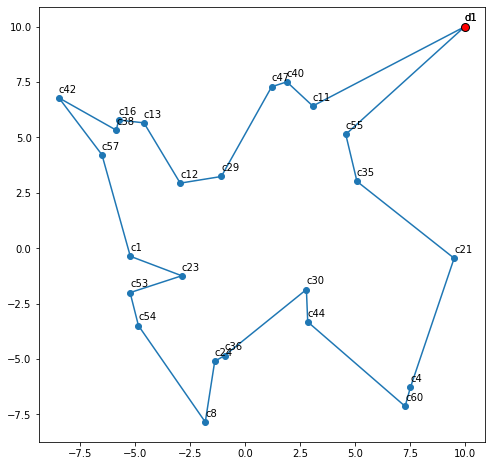

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(to_plot.x, to_plot.y, "-o")
ax.plot(to_plot["x"][0], to_plot["y"][0], marker='o', markersize=8, markerfacecolor='red', markeredgecolor='black')

for i, label in enumerate(to_plot['label']):
    ax.text(to_plot['x'][i], to_plot['y'][i] +0.25, label)
    
plt.savefig('path_2.jpg')